In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
ls points

 El volumen de la unidad D es LENOVO
 El n£mero de serie del volumen es: 2C65-F323

 Directorio de D:\github\seawall\scivis2018\points

30-07-2018  13:40    <DIR>          .
30-07-2018  13:40    <DIR>          ..
30-07-2018  13:14         3,644,978 ya31.csv
30-07-2018  13:38         3,661,988 ya32.csv
30-07-2018  13:39         3,595,394 yb31.csv
30-07-2018  13:40         3,592,127 yc31.csv
               4 archivos     14,494,487 bytes
               2 dirs  867,187,441,664 bytes libres


In [6]:
data = np.loadtxt('points/ya32.csv',delimiter=',',skiprows=1)

In [7]:
x = data[:,3]/1e2
y = data[:,5]/1e2
z = data[:,4]/1e2

In [8]:
x.min(),x.max()

(-6000.0, 18000.0)

In [9]:
y.min(),y.max()

(-12000.0, 12000.0)

In [10]:
z.min(),z.max()

(-1066.9, 150.5)

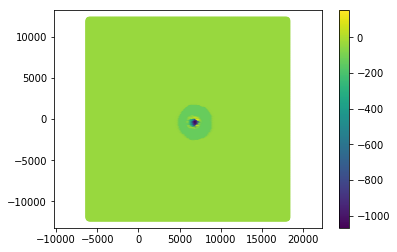

In [11]:
plt.scatter(x,y,c=z)
plt.axis('equal')
plt.colorbar()

In [9]:
from scipy.interpolate import griddata

In [10]:
xgrid = np.linspace(x.min(),x.max(),500)
ygrid = np.linspace(y.min(),y.max(),500)
xgrid,ygrid = np.meshgrid(xgrid,ygrid)

In [20]:
points = np.vstack([x,y]).T
values = z.copy()
zgrid = griddata(points,values, (xgrid, ygrid))
zgrid += -zgrid[0,0]

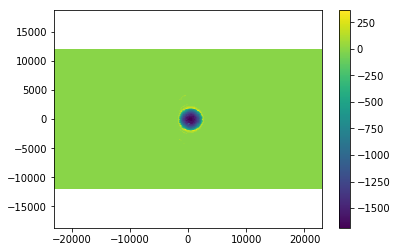

In [21]:
plt.pcolormesh(xgrid, ygrid, zgrid)
plt.axis('equal')
plt.colorbar()

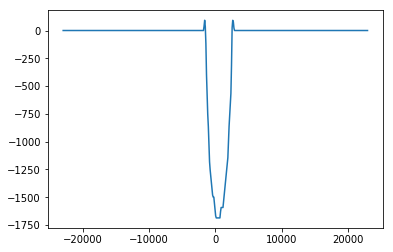

In [23]:
plt.plot(xgrid[250,:],zgrid[250,:])

In [26]:
np.savetxt('initialRectangle.csv', zgrid)